# Expolatory Data Analysis on EV

Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [3]:
df = pd.read_csv('/home/bishownath-raut/Downloads/IEA Global EV Data 2024.csv')

In [4]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  


In [5]:
print("\nData Types:")
print(df.dtypes)


Data Types:
region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object


Check for missing values

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


Remove duplicates

In [7]:
df.drop_duplicates(inplace=True)

Ensure correct data types

In [8]:
df['year'] = df['year'].astype(int)
df['value'] = df['value'].astype(float)

Descriptive Statistics

In [9]:
print("\nDescriptive Statistics (Numeric):")
print(df.describe())


Descriptive Statistics (Numeric):
               year         value
count  12654.000000  1.265400e+04
mean    2019.822112  4.273742e+05
std        5.476494  6.860498e+06
min     2010.000000  1.200000e-06
25%     2016.000000  2.000000e+00
50%     2020.000000  1.300000e+02
75%     2022.000000  5.500000e+03
max     2035.000000  4.400000e+08


We summerize the numerical features like year and value with mean, standard deviation, percentile and min, max

In [10]:
print("\nDescriptive Statistics (Categorical):")
print(df.describe(include='object'))


Descriptive Statistics (Categorical):
       region    category parameter   mode powertrain      unit
count   12654       12654     12654  12654      12654     12654
unique     54           3         8      5          6         6
top     World  Historical  EV stock   Cars         EV  Vehicles
freq     1250        9174      3470   4706       4894      6842


Then summerizing categorical features like region, category, parameter, mode, powertrain, and unit to count total number, unique, top, and frequency of top 

Here, we can analyze that large variance in value shows that uneven adoption across regions and time

## Data Visualization

Bar chart: EV stock and sales by region

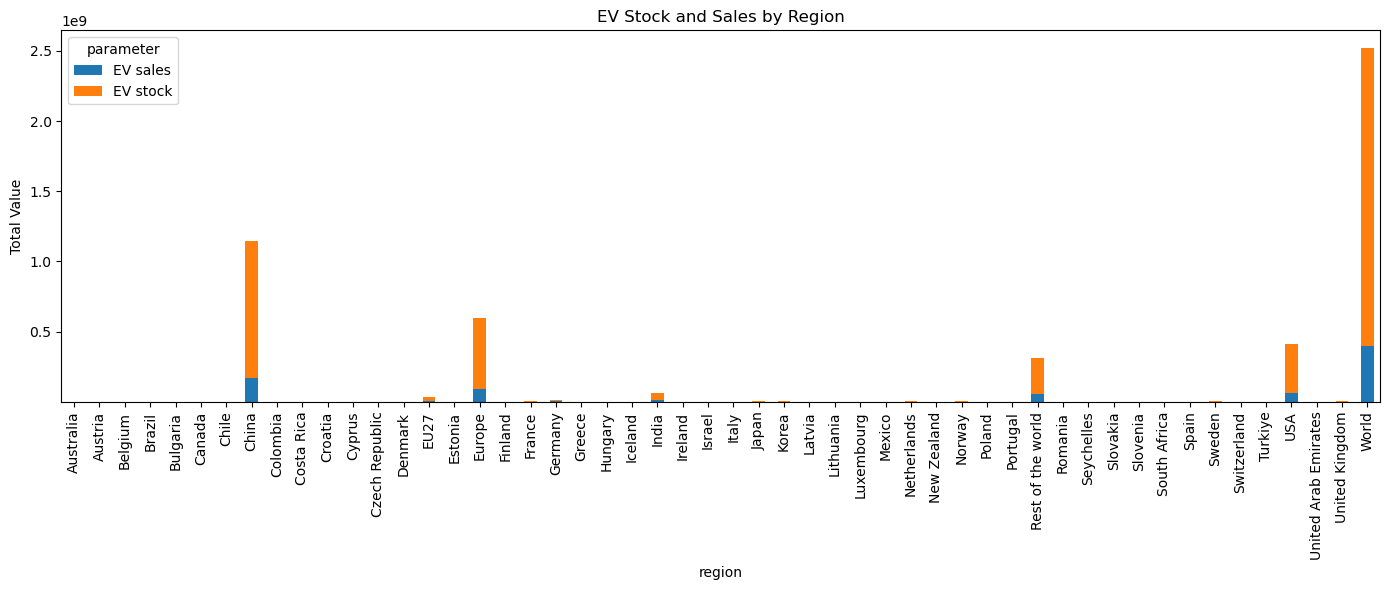

In [11]:
ev_sales_stock = df[df['parameter'].isin(['EV stock', 'EV sales'])]
ev_by_region = ev_sales_stock.groupby(['region', 'parameter'])['value'].sum().unstack().fillna(0)
ev_by_region.plot(kind='bar', figsize=(14, 6), stacked=True, title='EV Stock and Sales by Region')
plt.ylabel("Total Value")
plt.tight_layout()
plt.show()


Here, visualizing the EV stocks and sales by region, we can visualize that China, USA, and Europe has lead the EV adoption while other countries has adopted EV significantly low

Line chart: Trends over years

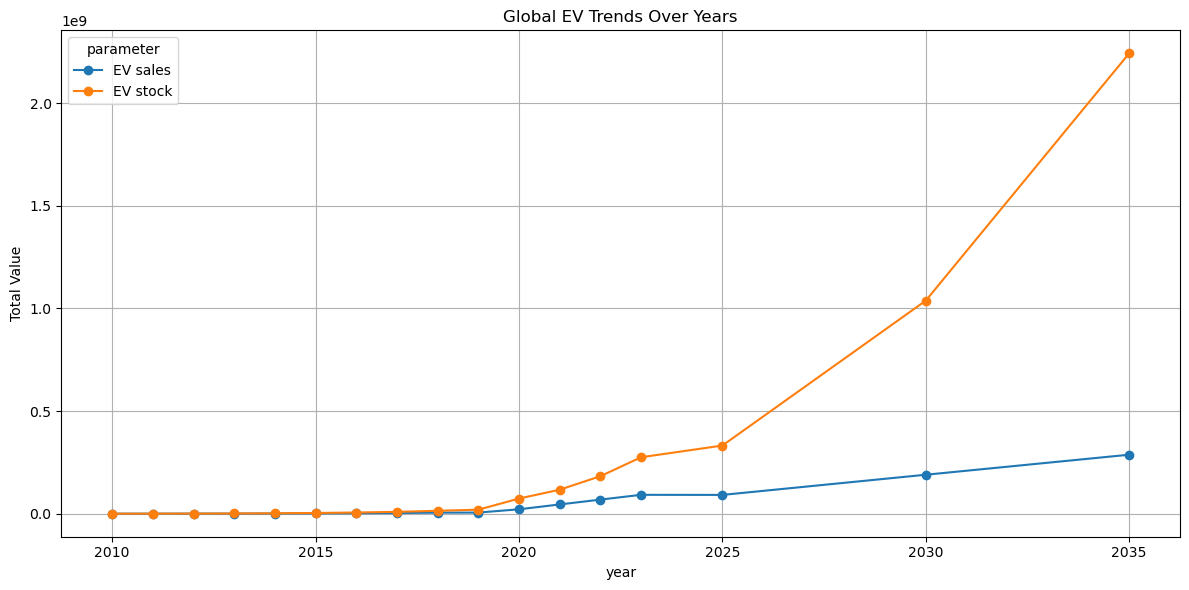

In [12]:
ev_trends = ev_sales_stock.groupby(['year', 'parameter'])['value'].sum().unstack()
ev_trends.plot(marker='o', figsize=(12, 6), title='Global EV Trends Over Years')
plt.ylabel("Total Value")
plt.grid(True)
plt.tight_layout()
plt.show()

From the trend of EV sales and stocks in graph we can interpret that the both sales and stocks have increased since around 2019 and trend shows they grow raipdly in future.

Box plot: Distribution of 'value' by parameter

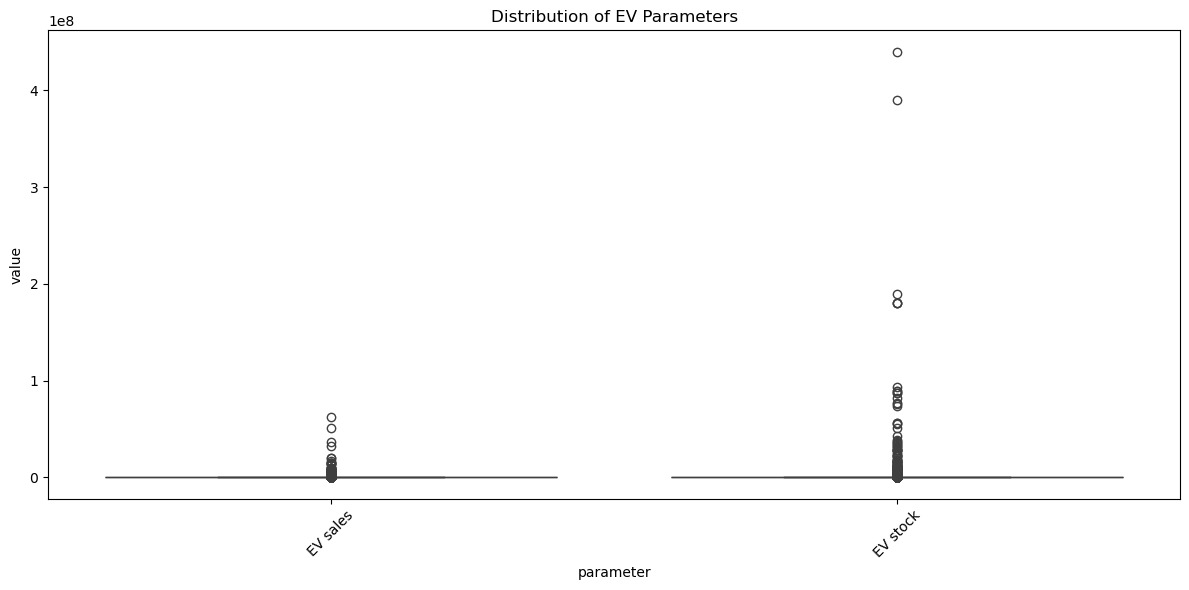

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ev_sales_stock, x='parameter', y='value')
plt.title("Distribution of EV Parameters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution and outlier of EV sales and EV stocks shows that EV stock has extreme outliers,because of dominant regions like China.

## Correlation Analysis 

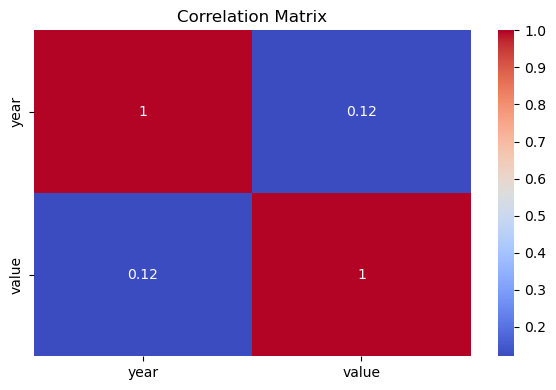

In [15]:
corr_matrix = df[['year', 'value']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Trend Analysis

/tmp/ipykernel_2163205/2595197556.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


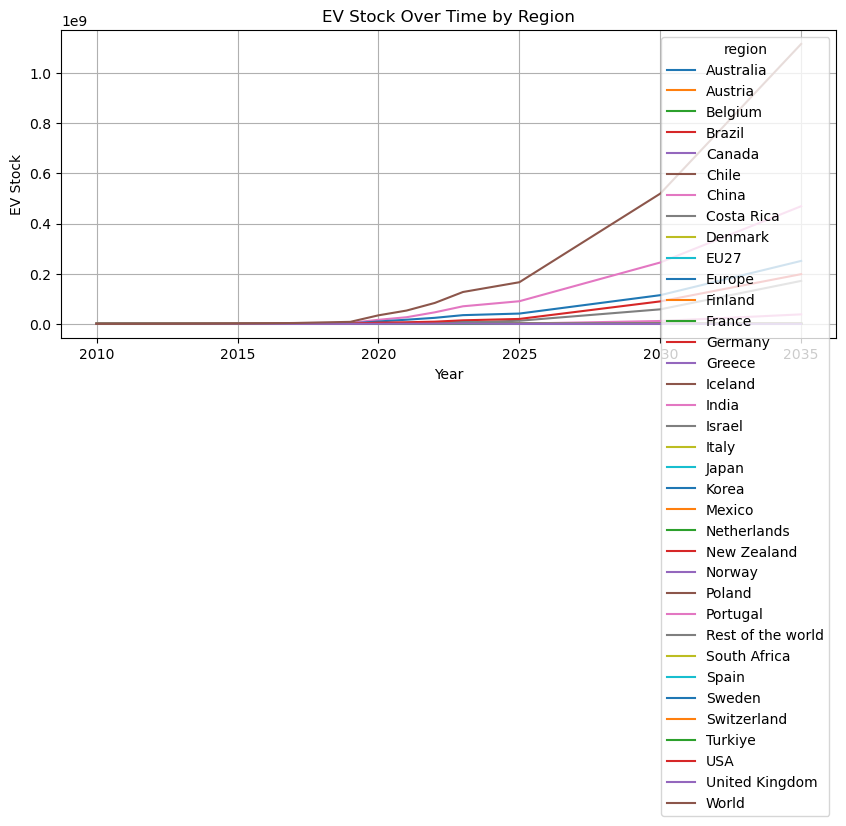

In [20]:
ev_stock = df[df['parameter'] == 'EV stock']
ev_stock_region_year = ev_stock.groupby(['year', 'region'])['value'].sum().unstack().fillna(0)
ev_stock_region_year.plot(figsize=(10, 4), title='EV Stock Over Time by Region')
plt.ylabel("EV Stock")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

From the trend analysis of EV adoption around the world illustrates that the regions like China, USA, and Europe have strong growth, meanwhile other countries are in early stages of EV adoptions.

## Comparative Analysis

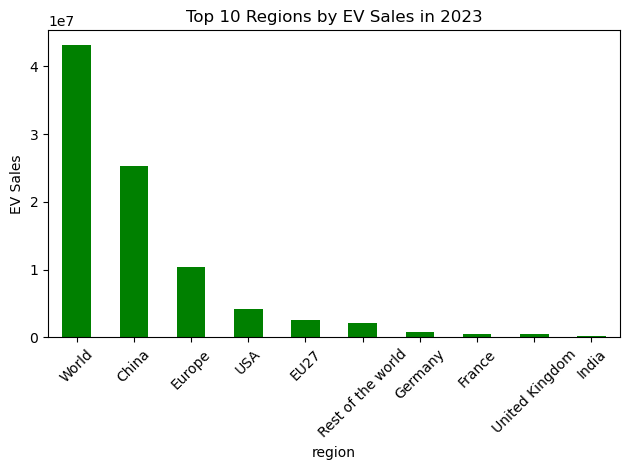

In [21]:
ev_2023_sales = df[(df['parameter'] == 'EV sales') & (df['year'] == 2023)]
top_regions_2023 = ev_2023_sales.groupby('region')['value'].sum().sort_values(ascending=False).head(10)
top_regions_2023.plot(kind='bar', color='green', title='Top 10 Regions by EV Sales in 2023')
plt.ylabel("EV Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bar Graph of top 10 regions by EV sales in 2023 shows that China has dominated the EV market, and Europe and USA are follwing the emerging market, analyzing the trend we predict that EV adoptions will rise in future.

In [22]:
print("\nKey Insights:")
print("- No missing values and no duplicates found in the dataset.")
print("- 'EV stock' and 'EV sales' have grown significantly over the years globally.")
print("- China, Europe, and the USA lead in EV adoption.")
print("- Some parameters are highly skewed and vary widely between regions.")
print("- Positive correlation exists between year and EV adoption values, indicating growth.")



Key Insights:
- No missing values and no duplicates found in the dataset.
- 'EV stock' and 'EV sales' have grown significantly over the years globally.
- China, Europe, and the USA lead in EV adoption.
- Some parameters are highly skewed and vary widely between regions.
- Positive correlation exists between year and EV adoption values, indicating growth.
